In [ ]:
import lseg.data as ld
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from lseg.data.content.historical_pricing import summaries 

In [ ]:
# Open the session using LSEG credentials 



start_date = "2014-01-01"
end_date = "2024-12-31"
universe = ["BP.L", "TTE", "OMVV.VI", "SHEL.L", "ENI.MI", "EQNR.N" ]

definition = summaries.Definition(
    universe=universe,
    interval="P1D",
    start=start_date,
    end=end_date,
    fields=["TRDPRC_1"]
)

# Retrieve data
data = definition.get_data()

extracted_data = data._data_raw  


In [ ]:
valid_data = [d for d in extracted_data if isinstance(d, dict) and 'data' in d]


dfs = []
for stock in valid_data:
    ric = stock['universe']['ric']
    df = pd.DataFrame(stock['data'], columns=['DATE', ric])
    dfs.append(df)


merged_df = dfs[0]
for df in dfs[1:]:
    merged_df = merged_df.merge(df, on='DATE', how='outer')

merged_df = merged_df.sort_values(by='DATE', ascending=False)


merged_df

,DATE,BP.L,TTE,OMVV.VI,SHEL.L,ENI.MI,EQNR.N
2840,2024-12-31,393.0000,54.500000,NaN,2476.000000,NaN,23.69
2839,2024-12-30,385.4000,54.480000,37.340,2441.000000,13.090,23.32
2838,2024-12-27,383.3645,54.520000,37.220,2443.500000,12.954,23.06
2837,2024-12-26,NaN,54.380000,NaN,NaN,NaN,22.69
2836,2024-12-24,382.7000,54.320000,NaN,2429.000000,NaN,22.79
...,...,...,...,...,...,...,...
4,2014-01-08,492.8500,57.960112,35.345,2163.500000,17.370,23.89
3,2014-01-07,492.6975,58.599197,34.980,2159.144729,17.660,23.87
2,2014-01-06,489.1071,58.432051,NaN,2145.699900,17.580,23.67
1,2014-01-03,489.8122,58.609029,34.530,2168.948100,17.480,23.72


In [ ]:


merged_df['DATE'] = pd.to_datetime(merged_df['DATE'])  


std_devs = merged_df.set_index('DATE').std()

std_devs



BP.L        83.296320
TTE          8.898521
OMVV.VI      9.666577
SHEL.L     433.400152
ENI.MI       2.532275
EQNR.N       6.448539
dtype: float64

In [ ]:

returns = np.log(merged_df.set_index('DATE') / merged_df.set_index('DATE').shift(1))


daily_vol = returns.std()


annualized_vol = daily_vol * np.sqrt(252)

print(annualized_vol)

BP.L       0.307962
TTE        0.289316
OMVV.VI    0.332885
SHEL.L     0.291146
ENI.MI     0.274950
EQNR.N     0.340725
dtype: float64


In [ ]:

returns = np.log(merged_df.iloc[:, 1:] / merged_df.iloc[:, 1:].shift(1))  


cov_matrix = returns.cov()


num_assets = len(returns.columns)
weights = np.ones(num_assets) / num_assets  


portfolio_variance = weights.T @ cov_matrix @ weights
portfolio_volatility = np.sqrt(portfolio_variance)

print(f"Portfolio Volatility: {portfolio_volatility:.6f}")


annual_volatility = portfolio_volatility * np.sqrt(252)
print(f"Annualized Portfolio Volatility: {annual_volatility:.6f}")


Portfolio Volatility: 0.015922
Annualized Portfolio Volatility: 0.252750


In [7]:
merged_df['DATE'] = pd.to_datetime(merged_df['DATE'], errors='coerce')
merged_df = merged_df.set_index('DATE')



In [8]:


correlation_matrix = merged_df.pct_change(fill_method=None).corr()
print(correlation_matrix)



             BP.L       TTE   OMVV.VI    SHEL.L    ENI.MI    EQNR.N
BP.L     1.000000  0.552048  0.567134  0.711739  0.636063  0.531521
TTE      0.552048  1.000000  0.599339  0.605154  0.694761  0.749367
OMVV.VI  0.567134  0.599339  1.000000  0.567045  0.669039  0.559651
SHEL.L   0.711739  0.605154  0.567045  1.000000  0.664643  0.557296
ENI.MI   0.636063  0.694761  0.669039  0.664643  1.000000  0.632970
EQNR.N   0.531521  0.749367  0.559651  0.557296  0.632970  1.000000


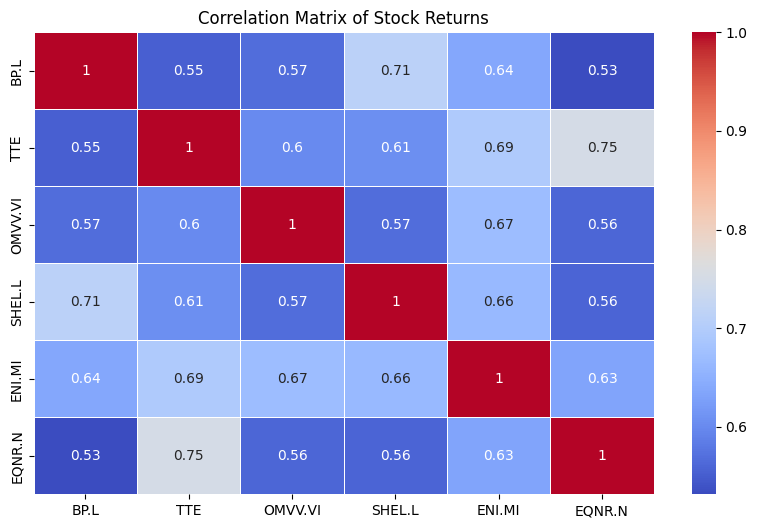

In [9]:


plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Stock Returns")
plt.show()


In [10]:
start_date_comm = "2014-01-01"
end_date_comm = "2024-12-24"


universe_oil = ["LCOc1", "TRNLTTFMc1"]

definition_oil = summaries.Definition(
    universe=universe_oil,
    interval="P1D",
    start=start_date_comm,
    end=end_date_comm,
    fields=["TRDPRC_1"]
)

# Retrieve data
data_oil = definition_oil.get_data()

extracted_oil = data_oil._data_raw  # List of dictionaries



In [ ]:
valid_comm_data = [d_comm for d_comm in extracted_oil if isinstance(d_comm, dict) and 'data' in d_comm]


comm_frames = []
for comm in valid_comm_data:
    ric_comm = comm['universe']['ric']
    comm_frame = pd.DataFrame(comm['data'], columns=['DATE', ric_comm])
    comm_frames.append(comm_frame)


merged_comm_frames = comm_frames[0]
for comm_frame in comm_frames[1:]:
    merged_comm_frames = merged_comm_frames.merge(comm_frame, on='DATE', how='outer')


merged_comm_frames = merged_comm_frames.sort_values(by='DATE')


merged_comm_frames

,DATE,LCOc1,TRNLTTFMc1
0,2014-01-02,107.82,27.30
1,2014-01-03,107.03,27.20
2,2014-01-06,107.00,27.33
3,2014-01-07,107.45,27.25
4,2014-01-08,107.31,27.50
...,...,...,...
2830,2024-12-18,72.99,40.97
2831,2024-12-19,72.67,43.28
2832,2024-12-20,72.98,44.20
2833,2024-12-23,72.96,45.75


In [12]:
merged_comm_frames['DATE'] = pd.to_datetime(merged_comm_frames['DATE'], errors='coerce')
merged_comm_frames = merged_comm_frames.set_index('DATE')



In [18]:
print(merged_comm_frames.isna().sum())


LCOc1          1
TRNLTTFMc1    37
dtype: int64


In [ ]:


returns_comm = np.log(merged_comm_frames / merged_comm_frames.shift(1))


daily_vol_comm = returns_comm.std()


annualized_vol_comm = daily_vol_comm * np.sqrt(252)

print(annualized_vol_comm)






LCOc1         0.386852
TRNLTTFMc1    0.729136
dtype: float64


In [ ]:

final_df = merged_df.join(merged_comm_frames, how='inner')


returns = final_df.pct_change(fill_method=None).dropna()


corr_matrix = returns.corr()
print(corr_matrix)


                BP.L       TTE   OMVV.VI    SHEL.L    ENI.MI    EQNR.N  \
BP.L        1.000000  0.551539  0.560604  0.709551  0.638043  0.529180   
TTE         0.551539  1.000000  0.597796  0.602131  0.694559  0.746524   
OMVV.VI     0.560604  0.597796  1.000000  0.562281  0.665407  0.554255   
SHEL.L      0.709551  0.602131  0.562281  1.000000  0.667174  0.551362   
ENI.MI      0.638043  0.694559  0.665407  0.667174  1.000000  0.629023   
EQNR.N      0.529180  0.746524  0.554255  0.551362  0.629023  1.000000   
LCOc1       0.390089  0.492662  0.401233  0.410696  0.468099  0.592189   
TRNLTTFMc1  0.061715  0.035338  0.041235  0.061598  0.064910  0.185910   

               LCOc1  TRNLTTFMc1  
BP.L        0.390089    0.061715  
TTE         0.492662    0.035338  
OMVV.VI     0.401233    0.041235  
SHEL.L      0.410696    0.061598  
ENI.MI      0.468099    0.064910  
EQNR.N      0.592189    0.185910  
LCOc1       1.000000    0.136290  
TRNLTTFMc1  0.136290    1.000000  


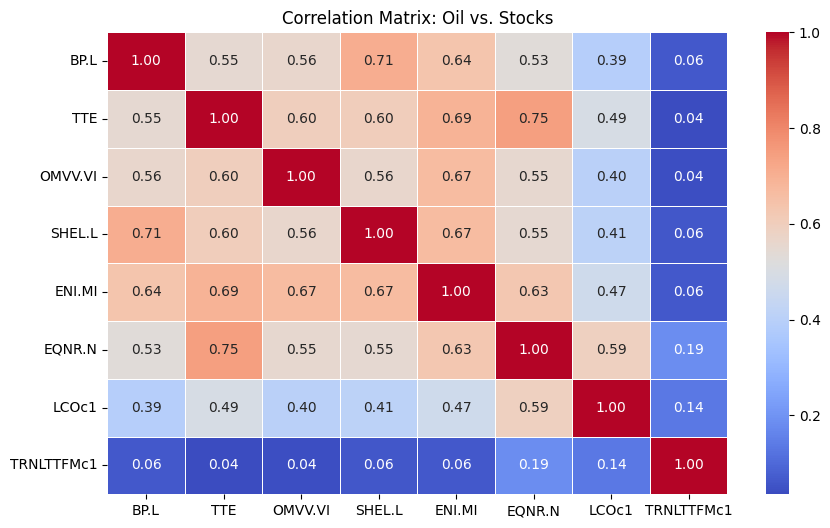

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix: Oil vs. Stocks")
plt.show()
